In [168]:
import sys
sys.path.append('..')
import os

from utils.constants import *
from utils.file_readers import *
from utils.data_exploration import *
from utils.signal_processing import *
from utils.sliding_window import *
from utils.stand_norm import *
from utils.one_vs_all_training import *
from utils.experiment_utils import *
from utils.detect_peaks import *

import matplotlib.patches as mpatches

from keras.models import load_model
from scipy.signal import savgol_filter

In [2]:
# data = read_all_files()

In [27]:
test_exercises = pd.read_csv("./test_exercises.csv")

In [28]:
# first index where the not null value occurs
first_non_null = test_exercises[test_exercises['pred_fast'].notnull()].index[0]

In [29]:
first_non_null_value = test_exercises[test_exercises['pred_fast'].notnull()].iloc[0]['pred_fast']

In [ ]:
# slice of column until the first not null
test_exercises.loc[0:first_non_null, 'pred_fast'] = first_non_null_value

In [41]:
indices = test_exercises[test_exercises['pred_fast'].notnull()].index.values
values_fast = test_exercises[test_exercises['pred_fast'].notnull()]['pred_fast'].values
values_slow = test_exercises[test_exercises['pred_fast'].notnull()]['pred_slow'].values
actual_values = test_exercises[test_exercises['pred_fast'].notnull()]['actual_exercise'].values

Text(0.5, 0, 'Time windows')

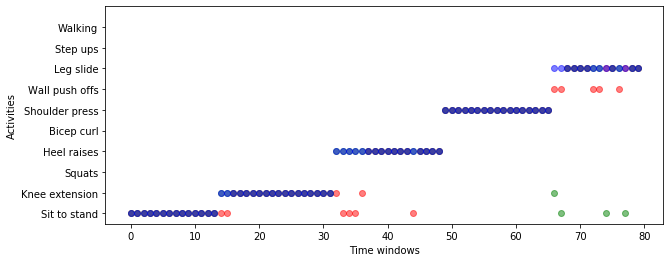

In [66]:
fig = plt.figure(figsize=(10,4))

plt.plot(range(len(values_fast)), values_fast, 'o', color='red', alpha=0.5)
plt.plot(range(len(values_slow)), values_slow, 'o', color='green', alpha=0.5)
plt.plot(range(len(actual_values)), actual_values, 'o', color='blue', alpha=0.5)
plt.ylim((-0.5, 10))
plt.yticks(ticks=range(0, 10), labels=list(get_activity_name_dict().keys()))

plt.ylabel("Activities")
plt.xlabel("Time windows")

In [70]:
# load model
final_model_no_outliers = load_model("./final_model_no_outliers.h5")

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [78]:
# standardise the data
performed_exercises = [int(i) for i in set(test_exercises[test_exercises['actual_exercise'].notnull()]['actual_exercise'].values)]

In [79]:
performed_exercises

[0, 1, 3, 5, 7]

In [88]:
correctness='all'
# Loading data
data = pd.read_csv("../Preprocessed/raw_data.csv")
data = data.reindex(columns=['timestamp', 'seq', 'accel_x', 'accel_y', 'accel_z',
                             'accel_magnitude', 'accel_pca',
                             'subject', 'activity', 'correctness',
                             'accel_x_standardised', 'accel_y_standardised', 'accel_z_standardised',
                             'accel_magnitude_standardised', 'accel_pca_standardised',
                             'accel_x_normalised', 'accel_y_normalised', 'accel_z_normalised',
                             'accel_magnitude_normalised', 'accel_pca_normalised'])

random.seed(42)

n_classes = 10
activities = 'all'

subjects = get_subject_names()
n_subjects = len(subjects)

# sgd = optimizers.SGD(lr=lr)
# adam = optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)

train_subjects = get_subject_names()[2:]
valid_subjects = get_subject_names()[:2]
train_valid_subjects = get_subject_names()

In [89]:
print("-" * 80)
print("Standardising")
print("-" * 80)

# standardise for training
data_train = standardise_data(data, activities=activities, subjects=train_valid_subjects,
                              correctness=correctness)

print("-" * 80)
print("Normalising")
print("-" * 80)

# normalise for training
data_train, scaler_fit = normalise_data(data_train, activities=activities, subjects=train_valid_subjects,
                                        correctness=correctness)

--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
--------------------------------------------------------------------------------


## Now that we have the scaler_fit we can use it to scale the new exercise data

In [334]:
pickle.dump(scaler_fit, open('scaler_fit.p', 'wb'))

In [102]:
def windows(d, w, t):
    r = np.arange(len(d))
    s = r[::t]
    z = list(zip(s, s + w))
    f = '{0[0]}:{0[1]}'.format
    g = lambda t: d.iloc[t[0]:t[1]]
    return map(g, z)

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Actual exercise = 0
Fast pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Slow pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Actual exercise = 1
Fast pred = [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Slow pred = [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Actual exercise = 3
Fast pred = [0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Slow pred = [3 3 3 3 3 3 3 3 3 3 3 3 3 3]


/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Actual exercise = 5
Fast pred = [5 5 5 5 5 5 5 5 5 5 5 5 5]
Slow pred = [5 5 5 5 5 5 5 5 5 5 5 5 5]


/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Actual exercise = 7
Fast pred = [6 6 6 7 7 7 7 6 6 7 7]
Slow pred = [1 1 0 7 7 7 7 0 0 0 7]


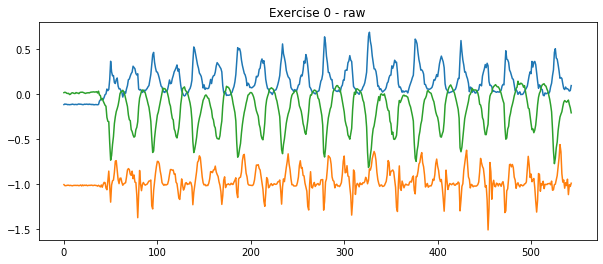

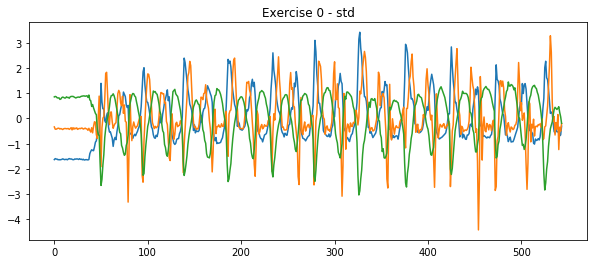

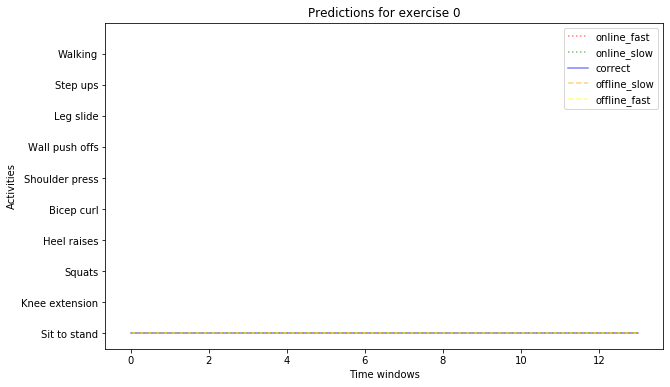

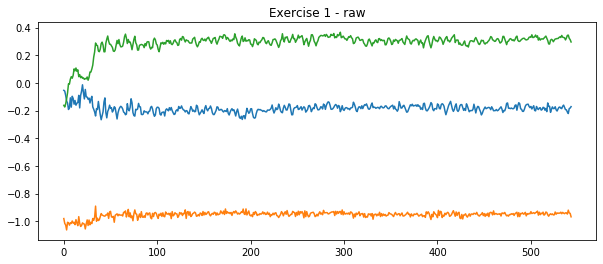

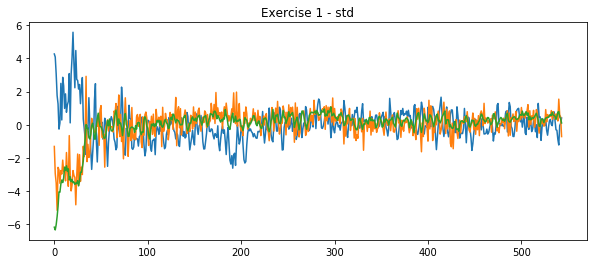

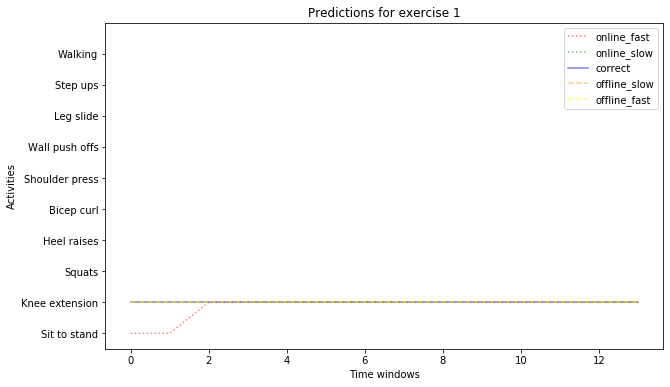

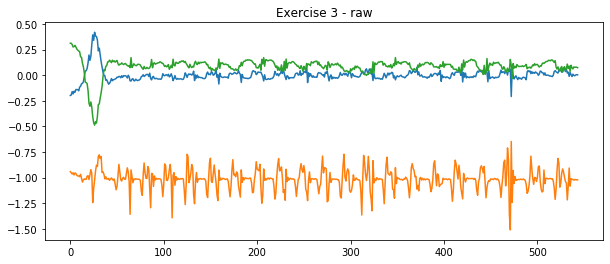

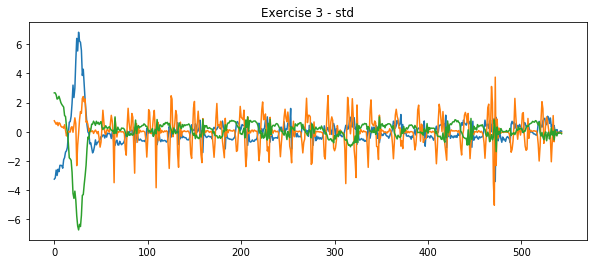

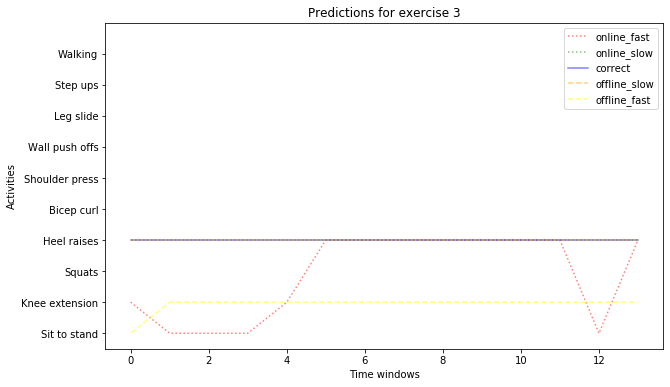

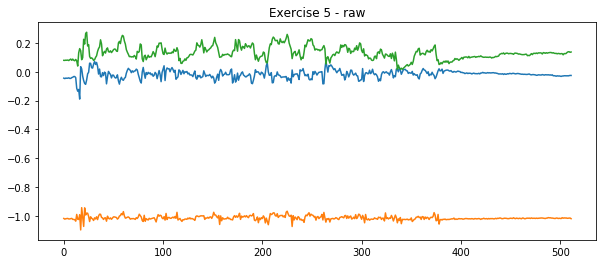

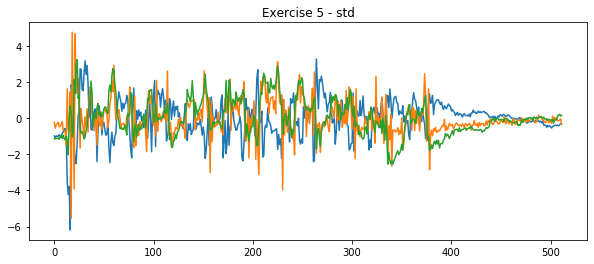

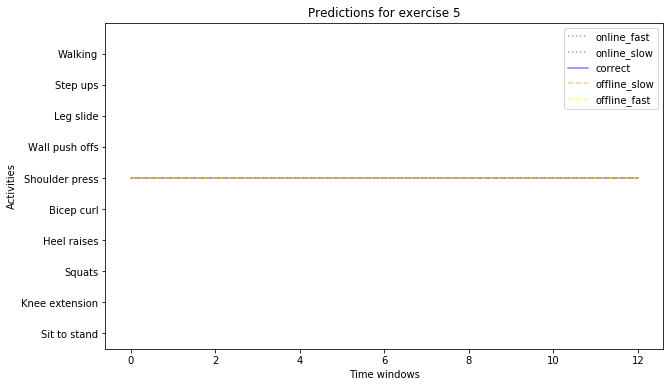

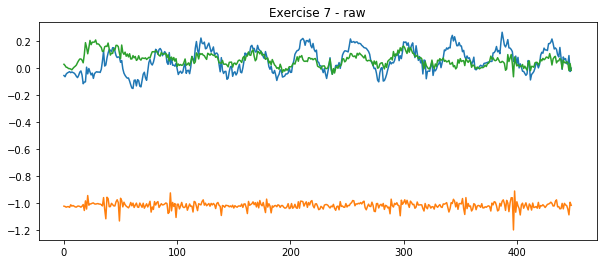

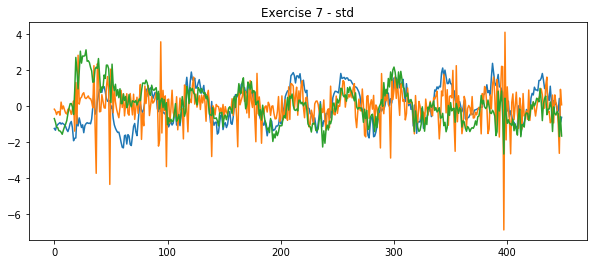

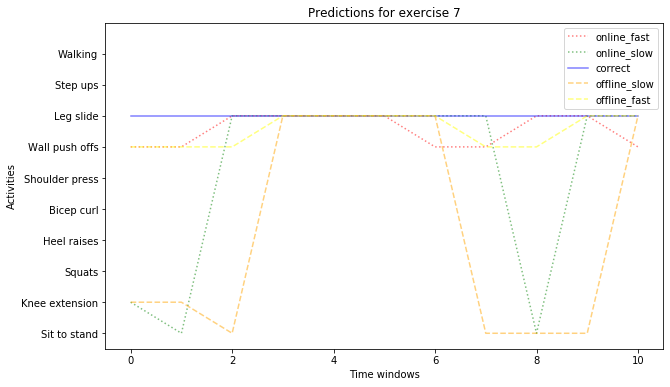

In [236]:
predictions_slow = []
predictions_fast = []

for pe in performed_exercises:
    
    predictions_slow_pe = []
    predictions_fast_pe = []
    
    # select the slice of data for the ith exercise
    data = test_exercises[test_exercises['actual_exercise'] == pe]
    
    # plot
    fig = plt.figure(figsize=(10, 4))
    plt.title("Exercise {} - raw".format(pe))
    plt.plot(range(len(data)), data['x'])
    plt.plot(range(len(data)), data['y'])
    plt.plot(range(len(data)), data['z'])
    
    # standardise data
    scaler = StandardScaler()
    scaler.fit(data[['x', 'y', 'z']])
    new_vals = scaler.transform(data[['x', 'y', 'z']])
    
    data['x_std'] = new_vals[:, 0]
    data['y_std'] = new_vals[:, 1]
    data['z_std'] = new_vals[:, 2]
    
    fig = plt.figure(figsize=(10,4))
    plt.title("Exercise {} - std".format(pe))
    plt.plot(range(len(data)), data['x_std'])
    plt.plot(range(len(data)), data['y_std'])
    plt.plot(range(len(data)), data['z_std'])
    
    # normalise data
    normaliser_fast = scaler_fit['correct'][pe]
    normaliser_slow = scaler_fit['incorrect'][pe]
    
    new_vals = normaliser_fast.transform(data[['x_std', 'y_std', 'z_std', 'x', 'y']]) # need dummy values because the scaler was trained on 5 cols
    data['x_norm_fast'] = new_vals[:, 0]
    data['y_norm_fast'] = new_vals[:, 1]
    data['z_norm_fast'] = new_vals[:, 2]
    
    new_vals = normaliser_slow.transform(data[['x_std', 'y_std', 'z_std', 'x', 'y']])
    data['x_norm_slow'] = new_vals[:, 0]
    data['y_norm_slow'] = new_vals[:, 1]
    data['z_norm_slow'] = new_vals[:, 2]
    
    # generate windows of size 125 with a step size of 30
    segments_slow, labels = generate_sequence(dataframe=data, target_vals=data['actual_exercise'],
                                         columns=['x_norm_slow','y_norm_slow','z_norm_slow'], n_time_steps=125, step=30)
    segments_slow, labels = reshape_segments(segments_slow, labels, n_time_steps=125, n_features=3)
    
    segments_fast, labels = generate_sequence(dataframe=data, target_vals=data['actual_exercise'],
                                         columns=['x_norm_fast','y_norm_fast','z_norm_fast'], n_time_steps=125, step=30)
    
    segments_fast, labels = reshape_segments(segments_fast, labels, n_time_steps=125, n_features=3)


    predictions_fast_pe = final_model_no_outliers.predict_classes(segments_fast)
    predictions_slow_pe = final_model_no_outliers.predict_classes(segments_slow)
    
    print("Actual exercise = {}".format(pe))
    print("Fast pred = {}".format(predictions_fast_pe))
    print("Slow pred = {}".format(predictions_slow_pe))
    

    predictions_slow.extend(predictions_slow_pe)
    predictions_fast.extend(predictions_fast_pe)
    
    # get online predictions
    online_fast = data[data['pred_fast'].notnull()]['pred_fast'].values
    online_slow = data[data['pred_fast'].notnull()]['pred_slow'].values
    actual_ex = data[data['pred_fast'].notnull()]['actual_exercise'].values
    
    # only plot as many points as offile predictions
    num_pred = len(predictions_fast_pe)
    
    fig = plt.figure(figsize=(10,6))
    plt.plot(range(num_pred), online_fast[:num_pred], ':', color='red', alpha=0.5, label="online_fast")
    plt.plot(range(num_pred), online_slow[:num_pred], ':', color='green', alpha=0.5, label='online_slow')
    plt.plot(range(num_pred), actual_ex[:num_pred], '-', color='blue', alpha=0.5, label="correct")
    plt.plot(range(num_pred), predictions_slow_pe, '--', color='orange', alpha=0.5, label="offline_slow")
    plt.plot(range(num_pred), predictions_fast_pe, '--', color='yellow', alpha=0.5, label="offline_fast")
    plt.ylim((-0.5, 10))
    plt.yticks(ticks=range(0, 10), labels=list(get_activity_name_dict().keys()))

    plt.ylabel("Activities")
    plt.xlabel("Time windows")
    plt.title("Predictions for exercise {}".format(pe))
    plt.legend()

In [ ]:
fig = plt.subplots

## Try stripplot

In [237]:
data

,ts,x,y,z,actual_exercise,pred_fast,pred_slow,x_std,y_std,z_std,x_norm_fast,y_norm_fast,z_norm_fast,x_norm_slow,y_norm_slow,z_norm_slow
2144,1586909763691,-0.057129,-1.022217,0.026123,7.0,NaN,NaN,-1.246010,-0.175948,-0.698741,0.249676,0.485466,0.496307,0.430459,0.425629,0.514541
2145,1586909763696,-0.065918,-1.024658,0.016602,7.0,NaN,NaN,-1.345363,-0.269230,-0.901281,0.236232,0.473071,0.477709,0.417940,0.414649,0.499695
2146,1586909763702,-0.046143,-1.030029,0.003906,7.0,NaN,NaN,-1.121818,-0.474452,-1.171334,0.266480,0.445801,0.452913,0.446108,0.390494,0.479901
2147,1586909763708,-0.038086,-1.026123,0.002441,7.0,NaN,NaN,-1.030744,-0.325198,-1.202494,0.278803,0.465634,0.450052,0.457584,0.408062,0.477617
2148,1586909763713,-0.033447,-1.025879,-0.005615,7.0,NaN,NaN,-0.978308,-0.315871,-1.373874,0.285898,0.466873,0.434316,0.464191,0.409160,0.465055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,1586909796095,0.031006,-1.018066,0.044678,7.0,NaN,NaN,-0.249717,-0.017368,-0.304047,0.384485,0.506538,0.532547,0.555997,0.444294,0.543471
2589,1586909796095,0.027100,-1.042969,0.040039,7.0,NaN,NaN,-0.293874,-0.968850,-0.402721,0.378510,0.380106,0.523487,0.550433,0.332302,0.536238
2590,1586909796096,0.090332,-1.086426,-0.020996,7.0,NaN,NaN,0.420918,-2.629273,-1.701054,0.475229,0.159469,0.404274,0.640500,0.136865,0.441074
2591,1586909796097,-0.027344,-0.993408,0.031494,7.0,NaN,NaN,-0.909313,0.924783,-0.584487,0.295234,0.631731,0.506797,0.472885,0.555188,0.522915


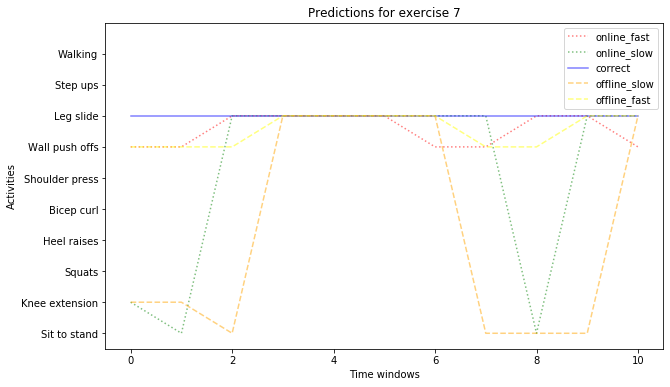

In [238]:
fig = plt.figure(figsize=(10,6))
plt.plot(range(num_pred), online_fast[:num_pred], ':', color='red', alpha=0.5, label="online_fast")
plt.plot(range(num_pred), online_slow[:num_pred], ':', color='green', alpha=0.5, label='online_slow')
plt.plot(range(num_pred), actual_ex[:num_pred], '-', color='blue', alpha=0.5, label="correct")
plt.plot(range(num_pred), predictions_slow_pe, '--', color='orange', alpha=0.5, label="offline_slow")
plt.plot(range(num_pred), predictions_fast_pe, '--', color='yellow', alpha=0.5, label="offline_fast")
plt.ylim((-0.5, 10))
plt.yticks(ticks=range(0, 10), labels=list(get_activity_name_dict().keys()))

plt.ylabel("Activities")
plt.xlabel("Time windows")
plt.title("Predictions for exercise {}".format(pe))
plt.legend()

In [241]:
data[data['pred_fast'].notnull()]

,ts,x,y,z,actual_exercise,pred_fast,pred_slow,x_std,y_std,z_std,x_norm_fast,y_norm_fast,z_norm_fast,x_norm_slow,y_norm_slow,z_norm_slow
2171,1586909763934,-0.043457,-1.005615,0.190186,7.0,6.0,1.0,-1.091460,0.458373,2.791181,0.270588,0.569755,0.816751,0.449933,0.500290,0.770342
2202,1586909766106,-0.098389,-1.019775,0.104004,7.0,6.0,0.0,-1.712418,-0.082666,0.957933,0.186565,0.497862,0.648422,0.371690,0.436608,0.635970
2233,1586909769289,0.119873,-1.006104,0.103760,7.0,7.0,7.0,0.754855,0.439715,0.952740,0.520414,0.567276,0.647945,0.682578,0.498094,0.635589
2264,1586909771092,0.171875,-1.009277,0.106445,7.0,7.0,7.0,1.342696,0.318450,1.009867,0.599955,0.551162,0.653191,0.756648,0.483821,0.639777
2295,1586909773648,-0.029053,-1.018555,0.035156,7.0,7.0,7.0,-0.928631,-0.036025,-0.506587,0.292620,0.504059,0.513950,0.470451,0.442098,0.528625
2326,1586909776029,-0.010986,-1.020996,0.049072,7.0,7.0,7.0,-0.724405,-0.129307,-0.210567,0.320254,0.491664,0.541131,0.496184,0.431119,0.550322
2357,1586909778798,0.166260,-1.002930,0.047363,7.0,6.0,7.0,1.279220,0.560981,-0.246921,0.591366,0.583389,0.537793,0.748650,0.512368,0.547658
2388,1586909781188,-0.004395,-0.988770,0.012451,7.0,6.0,7.0,-0.649890,1.102019,-0.989568,0.330337,0.655282,0.469603,0.505573,0.576049,0.493224
2419,1586909783570,-0.003418,-1.062500,0.026611,7.0,7.0,0.0,-0.638851,-1.715106,-0.688354,0.331831,0.280943,0.497260,0.506964,0.244466,0.515302
2450,1586909785962,0.138916,-0.985107,0.149414,7.0,7.0,7.0,0.970121,1.241943,1.923894,0.549542,0.673875,0.737117,0.709702,0.592519,0.706772


In [254]:
new_df = pd.DataFrame()
new_df['online_fast'] = list(map(lambda x: int(x), online_fast[:num_pred]))
new_df['online_slow'] = list(map(lambda x: int(x), online_slow[:num_pred]))
new_df['actual_ex'] = list(map(lambda x: int(x), actual_ex[:num_pred]))
new_df['offline_fast'] = predictions_fast_pe
new_df['offline_slow'] = predictions_slow_pe
new_df['time'] = new_df.index

In [255]:
new_df

,online_fast,online_slow,actual_ex,offline_fast,offline_slow,time
0,6,1,7,6,1,0
1,6,0,7,6,1,1
2,7,7,7,6,0,2
3,7,7,7,7,7,3
4,7,7,7,7,7,4
5,7,7,7,7,7,5
6,6,7,7,7,7,6
7,6,7,7,6,0,7
8,7,0,7,6,0,8
9,7,7,7,7,0,9


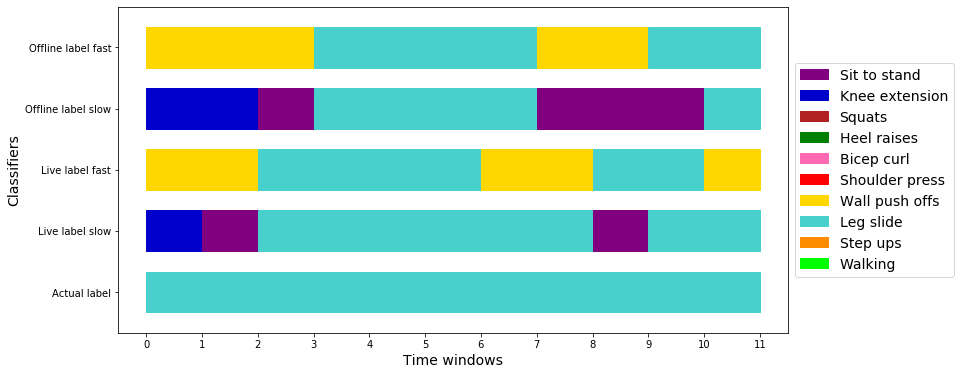

In [348]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)



for i, val in enumerate(new_df['actual_ex'].values):
    rect = plt.Rectangle((i,0), width=1, height=1, color=activity_colors[val])
    ax.add_patch(rect)

for i, val in enumerate(new_df['online_slow'].values):
    rect = plt.Rectangle((i, 1.5), width=1, height=1, color=activity_colors[val])
    ax.add_patch(rect)
    
for i, val in enumerate(new_df['online_fast'].values):
    rect = plt.Rectangle((i, 3), width=1, height=1, color=activity_colors[val])
    ax.add_patch(rect)
    
for i, val in enumerate(new_df['offline_slow'].values):
    rect = plt.Rectangle((i, 4.5), width=1, height=1, color=activity_colors[val])
    ax.add_patch(rect)
    
for i, val in enumerate(new_df['offline_fast'].values):
    rect = plt.Rectangle((i, 6), width=1, height=1, color=activity_colors[val])
    ax.add_patch(rect)

plt.xlim((-0.5, len(new_df) + 0.5))
plt.ylim((-0.5, 7.5))

locs = [0.5, 2, 3.5, 5, 6.5]
labels = ['Actual label', 'Live label slow', 'Live label fast', 'Offline label slow', 'Offline label fast']
plt.yticks(locs, labels)


# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=handles, fontsize=14)
# plt.legend(handles=handles, fontsize=14)

plt.xlabel("Time windows", fontsize=14)
plt.ylabel("Classifiers", fontsize=14)
plt.xticks(range(0, 12), range(0, 12))
plt.margins(0.5, 0.0)
plt.show()

fig.savefig("savepls.pdf")

## Cool, now streamline this when you get a new test_exercise file

In [339]:
# load model
final_model_no_outliers = load_model("./final_model_no_outliers.h5")

# load test exercises file
test_exercises = pd.read_csv("./test_exercises.csv")

# extract the phone classifications
indices = test_exercises[test_exercises['pred_fast'].notnull()].index.values
values_fast = test_exercises[test_exercises['pred_fast'].notnull()]['pred_fast'].values
values_slow = test_exercises[test_exercises['pred_fast'].notnull()]['pred_slow'].values
actual_values = test_exercises[test_exercises['pred_fast'].notnull()]['actual_exercise'].values

# get the list of performed exercises in the file
performed_exercises = [int(i) for i in set(test_exercises[test_exercises['actual_exercise'].notnull()]['actual_exercise'].values)]

# load the normaliser
scaler_fit = pickle.load(open('scaler_fit.p', 'rb'))

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [340]:
# set up plot vars
act_names = get_activity_label_dict()
activity_colors = {0:'purple',
                  1: 'mediumblue',
                  2: 'firebrick',
                  3: 'green',
                  4: 'hotpink',
                  5: 'red',
                  6: 'gold',
                  7: 'mediumturquoise',
                  8: 'darkorange',
                  9: 'lime'}

handles=[]
for i in range(10):
    patch = mpatches.Patch(color=activity_colors[i], label='{}'.format(act_names[i]))
    handles.append(patch)

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Actual exercise = 0
Fast pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Slow pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


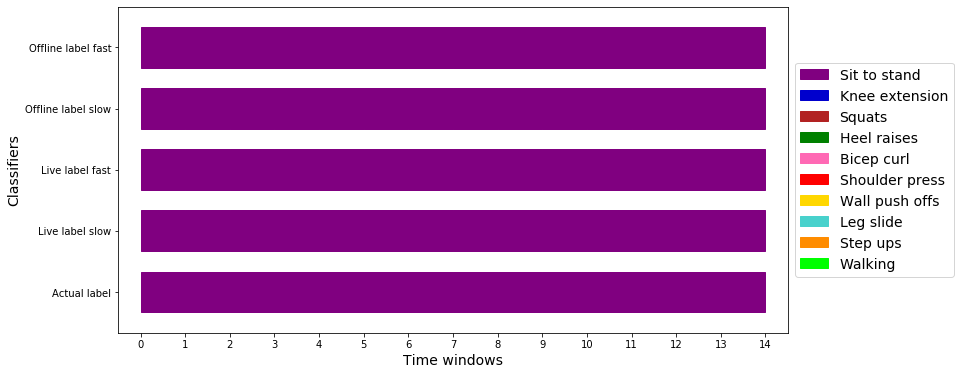

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Actual exercise = 1
Fast pred = [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Slow pred = [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


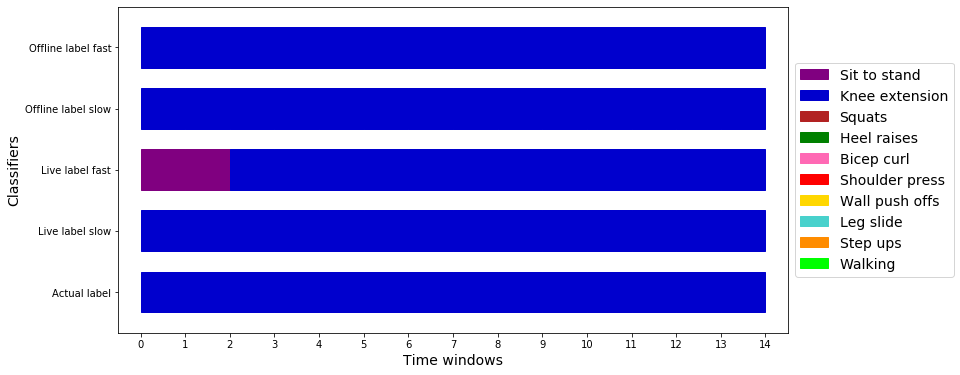

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Actual exercise = 3
Fast pred = [0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Slow pred = [3 3 3 3 3 3 3 3 3 3 3 3 3 3]


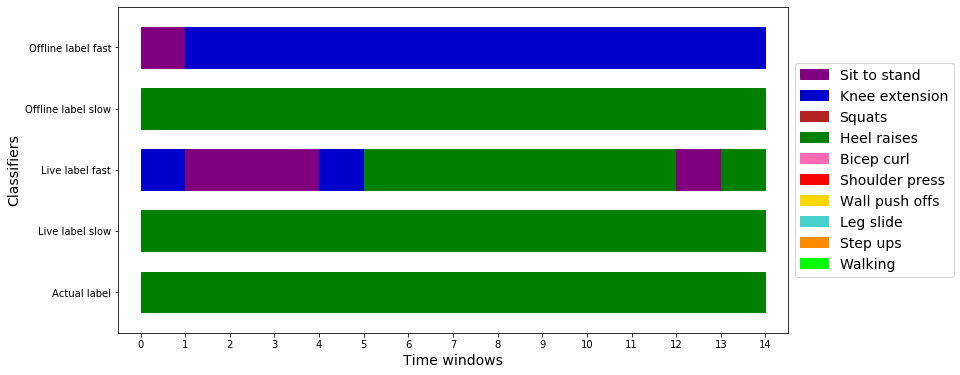

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Actual exercise = 5
Fast pred = [5 5 5 5 5 5 5 5 5 5 5 5 5]
Slow pred = [5 5 5 5 5 5 5 5 5 5 5 5 5]


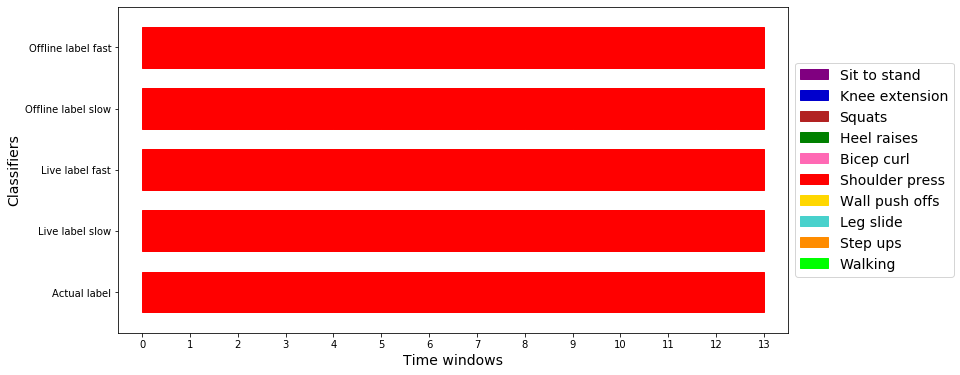

/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Actual exercise = 7
Fast pred = [6 6 6 7 7 7 7 6 6 7 7]
Slow pred = [1 1 0 7 7 7 7 0 0 0 7]


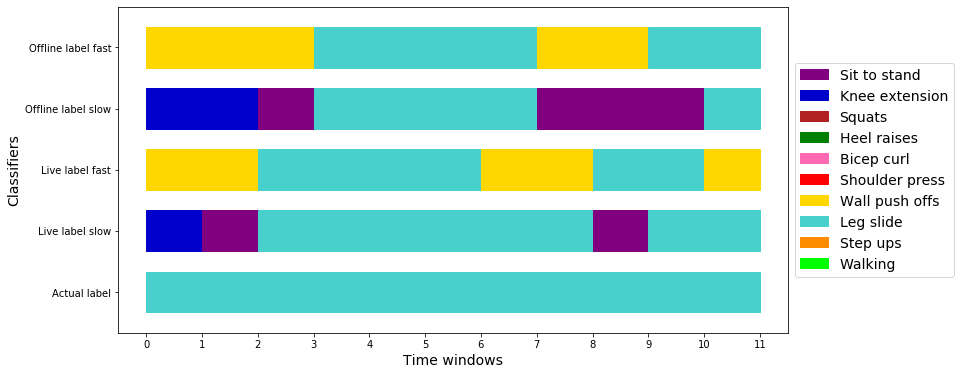

              Sit to stand  Knee extension  Heel raises  Shoulder press  \
online_fast            1.0        0.857143     0.571429             1.0   
online_slow            1.0        1.000000     1.000000             1.0   
offline_fast           1.0        1.000000     0.000000             1.0   
offline_slow           1.0        1.000000     1.000000             1.0   

              Leg slide  
online_fast    0.545455  
online_slow    0.727273  
offline_fast   0.545455  
offline_slow   0.454545  


In [362]:
accuracies = pd.DataFrame()
for pe in performed_exercises:
    
    predictions_slow_pe = []
    predictions_fast_pe = []
    
    # select the slice of data for the ith exercise
    data = test_exercises[test_exercises['actual_exercise'] == pe]
    
    # standardise data
    scaler = StandardScaler()
    scaler.fit(data[['x', 'y', 'z']])
    new_vals = scaler.transform(data[['x', 'y', 'z']])
    
    data['x_std'] = new_vals[:, 0]
    data['y_std'] = new_vals[:, 1]
    data['z_std'] = new_vals[:, 2]
    
    # normalise data
    normaliser_fast = scaler_fit['correct'][pe]
    normaliser_slow = scaler_fit['incorrect'][pe]
    
    new_vals = normaliser_fast.transform(data[['x_std', 'y_std', 'z_std', 'x', 'y']]) # need dummy values because the scaler was trained on 5 cols
    data['x_norm_fast'] = new_vals[:, 0]
    data['y_norm_fast'] = new_vals[:, 1]
    data['z_norm_fast'] = new_vals[:, 2]
    
    new_vals = normaliser_slow.transform(data[['x_std', 'y_std', 'z_std', 'x', 'y']])
    data['x_norm_slow'] = new_vals[:, 0]
    data['y_norm_slow'] = new_vals[:, 1]
    data['z_norm_slow'] = new_vals[:, 2]
    
    # generate windows of size 125 with a step size of 30
    segments_slow, labels = generate_sequence(dataframe=data, target_vals=data['actual_exercise'],
                                         columns=['x_norm_slow','y_norm_slow','z_norm_slow'], n_time_steps=125, step=30)
    segments_slow, labels = reshape_segments(segments_slow, labels, n_time_steps=125, n_features=3)
    
    segments_fast, labels = generate_sequence(dataframe=data, target_vals=data['actual_exercise'],
                                         columns=['x_norm_fast','y_norm_fast','z_norm_fast'], n_time_steps=125, step=30)
    
    segments_fast, labels = reshape_segments(segments_fast, labels, n_time_steps=125, n_features=3)


    offline_fast = final_model_no_outliers.predict_classes(segments_fast)
    offline_slow = final_model_no_outliers.predict_classes(segments_slow)
    
    print("Actual exercise = {}".format(pe))
    print("Fast pred = {}".format(offline_fast))
    print("Slow pred = {}".format(offline_slow))
    
    # get online predictions
    online_fast = data[data['pred_fast'].notnull()]['pred_fast'].values
    online_slow = data[data['pred_fast'].notnull()]['pred_slow'].values
    actual_ex = data[data['pred_fast'].notnull()]['actual_exercise'].values
    
    # only plot as many points as offile predictions
    num_pred = len(offline_fast)
    
    # now make the plots
    new_df = pd.DataFrame()
    new_df['online_fast'] = list(map(lambda x: int(x), online_fast[:num_pred]))
    new_df['online_slow'] = list(map(lambda x: int(x), online_slow[:num_pred]))
    new_df['actual_ex'] = list(map(lambda x: int(x), actual_ex[:num_pred]))
    new_df['offline_fast'] = offline_fast
    new_df['offline_slow'] = offline_slow
    new_df['time'] = new_df.index
    
    # record accuracies
    online_fast_acc = len(new_df[new_df['online_fast'] == new_df['actual_ex']]) / len(new_df)
    online_slow_acc = len(new_df[new_df['online_slow'] == new_df['actual_ex']]) / len(new_df)
    offline_fast_acc = len(new_df[new_df['offline_fast'] == new_df['actual_ex']]) / len(new_df)
    offline_slow_acc = len(new_df[new_df['offline_slow'] == new_df['actual_ex']]) / len(new_df)

    accuracies[act_names[pe]] = [online_fast_acc, online_slow_acc, offline_fast_acc, offline_slow_acc]
    
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1,1,1)

    for i, val in enumerate(new_df['actual_ex'].values):
        rect = plt.Rectangle((i,0), width=1, height=1, color=activity_colors[val])
        ax.add_patch(rect)

    for i, val in enumerate(new_df['online_slow'].values):
        rect = plt.Rectangle((i, 1.5), width=1, height=1, color=activity_colors[val])
        ax.add_patch(rect)

    for i, val in enumerate(new_df['online_fast'].values):
        rect = plt.Rectangle((i, 3), width=1, height=1, color=activity_colors[val])
        ax.add_patch(rect)

    for i, val in enumerate(new_df['offline_slow'].values):
        rect = plt.Rectangle((i, 4.5), width=1, height=1, color=activity_colors[val])
        ax.add_patch(rect)

    for i, val in enumerate(new_df['offline_fast'].values):
        rect = plt.Rectangle((i, 6), width=1, height=1, color=activity_colors[val])
        ax.add_patch(rect)

    plt.xlim((-0.5, len(new_df) + 0.5))
    plt.ylim((-0.5, 7.5))

    locs = [0.5, 2, 3.5, 5, 6.5]
    labels = ['Actual label', 'Live label slow', 'Live label fast', 'Offline label slow', 'Offline label fast']
    plt.yticks(locs, labels)


    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=handles, fontsize=14)
    # plt.legend(handles=handles, fontsize=14)

    plt.xlabel("Time windows", fontsize=14)
    plt.ylabel("Classifiers", fontsize=14)
    plt.xticks(range(0, len(new_df)+1), range(0, len(new_df)+1))
    plt.margins(0.5, 0.0)
    plt.show()

accuracies.index = ['online_fast', 'online_slow', 'offline_fast', 'offline_slow']
print(accuracies)

## Finally, given a test file and knowing whether the performed exercises were fast, slow or correct, show the classification accuracy

In [353]:
online_fast_acc = len(new_df[new_df['online_fast'] == new_df['actual_ex']]) / len(new_df)
online_slow_acc = len(new_df[new_df['online_slow'] == new_df['actual_ex']]) / len(new_df)
offline_fast_acc = len(new_df[new_df['offline_fast'] == new_df['actual_ex']]) / len(new_df)
offline_slow_acc = len(new_df[new_df['offline_slow'] == new_df['actual_ex']]) / len(new_df)

print("Online fast acc = {}".format(online_fast_acc))
print("Online slow acc = {}".format(online_slow_acc))
print("Offline fast acc = {}".format(offline_fast_acc))
print("Offline slow acc = {}".format(offline_slow_acc))

Online fast acc = 0.5454545454545454
Online slow acc = 0.7272727272727273
Offline fast acc = 0.5454545454545454
Offline slow acc = 0.45454545454545453


In [360]:
accuracies = pd.DataFrame()
accuracies['pe_1'] = [online_fast_acc, online_slow_acc, offline_fast_acc, offline_slow_acc]

In [361]:
accuracies.index = ['online_fast', 'online_slow', 'offline_fast', 'offline_slow']

In [357]:
accuracies

,pe_1
online_fast,0.545455
online_slow,0.727273
offline_fast,0.545455
offline_slow,0.454545


# Walking

In [2]:
data = read_all_files()

100%|██████████| 306/306 [00:23<00:00, 13.17it/s]


In [4]:
mask = (data['subject'] == 'teo') & (data['activity'] == 9) & (data['correctness'] == 'correct')

In [8]:
mag = data[mask]['accel_magnitude'].values
pca = data[mask]['accel_pca'].values

48


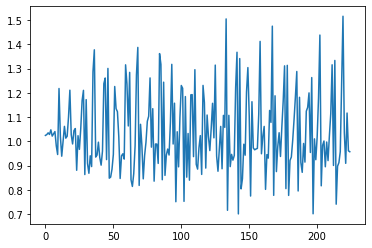

In [20]:
print(len(detect_peaks(mag, mpd=2)))
plt.plot(mag)

79


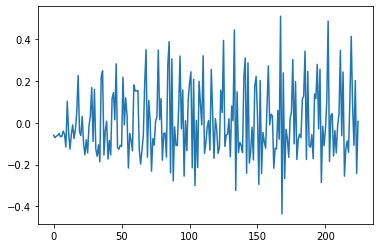

In [19]:
print(len(detect_peaks(pca)))
plt.plot(pca)

74


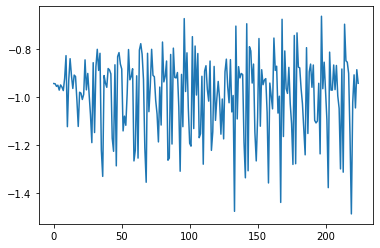

In [24]:
print(len(detect_peaks(data[mask]['accel_y'].values)))
plt.plot(data[mask]['accel_y'].values)

In [44]:
smooth_walk = savgol_filter(data[mask]['accel_y'].values, 9, 3)

In [45]:
smooth_walk

array([-0.94620028, -0.94523853, -0.94947876, -0.95618364, -0.96261585,
       -0.97157401, -0.93309068, -0.9445304 , -0.95754278, -0.9511465 ,
       -0.93516638, -0.93383893, -0.93626977, -0.92167207, -0.88190358,
       -0.94175291, -0.98419745, -0.99753957, -1.01216688, -1.04056328,
       -1.01472031, -0.98063785, -0.93862451, -0.93001724, -0.91963861,
       -0.9756747 , -0.98919862, -1.0537194 , -1.06365413, -1.04075352,
       -0.98922399, -0.88718379, -0.84618929, -0.94959922, -0.98106483,
       -1.05765946, -1.0950859 , -1.07412574, -1.0229936 , -0.89311502,
       -0.8626598 , -0.9740598 , -0.97638495, -1.06208993, -1.1096202 ,
       -1.09221964, -1.03127537, -0.91358902, -0.88308307, -0.91399064,
       -0.9259419 , -1.04577585, -1.06226749, -1.04509521, -1.00415145,
       -0.89600243, -0.8896104 , -0.95580104, -0.99871062, -1.11015288,
       -1.1312906 , -1.10433578, -1.0215943 , -0.87843699, -0.84194905,
       -0.95012343, -0.96048938, -1.07180905, -1.12079783, -1.08

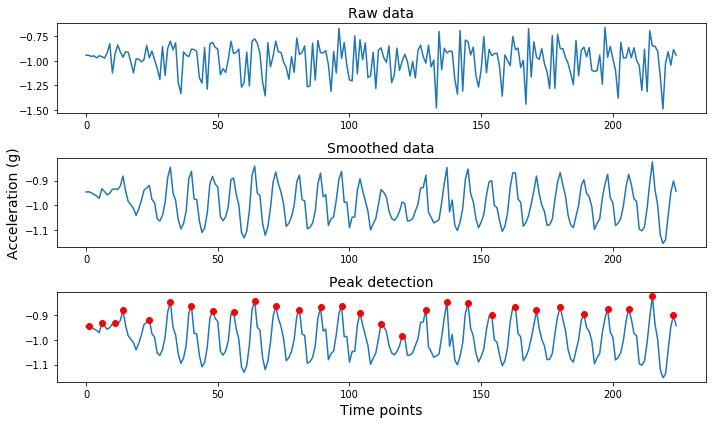

In [73]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(311)
ax.plot(data[mask]['accel_y'].values)
ax.set_title("Raw data", fontsize=14)

ax = fig.add_subplot(312)
ax.plot(smooth_walk)
ax.set_ylabel("Acceleration (g)", fontsize=14)
ax.set_title("Smoothed data", fontsize=14)

peaks = detect_peaks(smooth_walk, mpd=2)
ax = fig.add_subplot(313)
ax.plot(smooth_walk)
for peak in peaks:
    ax.plot(peak, smooth_walk[peak],'o', color='red')

ax.set_xlabel("Time points", fontsize=14)
ax.set_title("Peak detection", fontsize=14)

fig.tight_layout()
plt.savefig("step_detection.pdf")

In [68]:
peaks = detect_peaks(smooth_walk, mpd=2, mph=-0.5)

In [69]:
peaks

array([], dtype=int64)

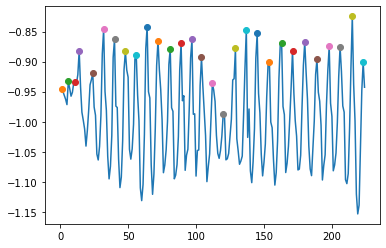

In [57]:
plt.plot(smooth_walk)
for peak in peaks:
    plt.plot(peak, smooth_walk[peak], 'o')

In [48]:
len(detect_peaks(data[mask]['accel_y'].values, mpd=2))

52

# Plot slow walk

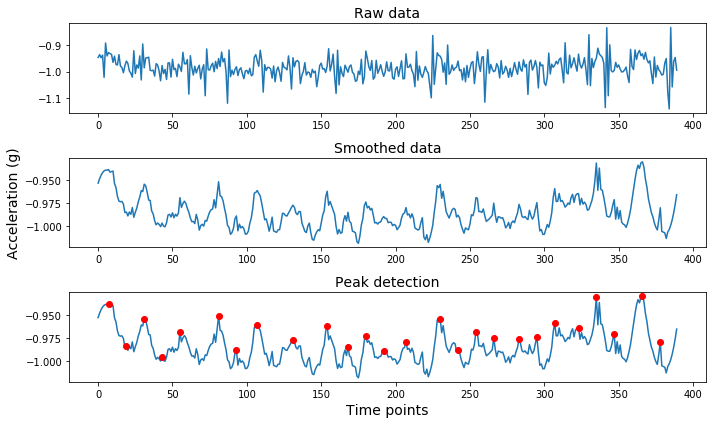

In [109]:
mask = (data['subject'] == 'teo') & (data['activity'] == 9) & (data['correctness'] == 'incorrect')
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(311)
ax.plot(data[mask]['accel_y'].values)
ax.set_title("Raw data", fontsize=14)

smooth_walk = savgol_filter(data[mask]['accel_y'].values, 13, 2)

ax = fig.add_subplot(312)
ax.plot(smooth_walk)
ax.set_ylabel("Acceleration (g)", fontsize=14)
ax.set_title("Smoothed data", fontsize=14)

peaks = detect_peaks(smooth_walk, mpd=11)
ax = fig.add_subplot(313)
ax.plot(smooth_walk)
for peak in peaks:
    ax.plot(peak, smooth_walk[peak],'o', color='red')

ax.set_xlabel("Time points", fontsize=14)
ax.set_title("Peak detection", fontsize=14)

fig.tight_layout()
plt.savefig("step_detection_slow.pdf")

In [105]:
subjects = get_subject_names()
correctness = ['correct', 'incorrect']

steps = {'correct':[], 'incorrect':[]}

for subject in subjects:
    print("*"*80)
    print("SUBJECT = {}".format(subject))
    print("*"*80)
    for c in correctness:
        print("*"*80)
        print("CORRECTNESS = {}".format(c))
        print("*"*80)
        mask = (data['activity'] == 9) & (data['subject'] == subject) & (data['correctness'] == c)
        
        walk_data = data[mask]['accel_y'].values
        smooth_walk = savgol_filter(walk_data, 13, 2)
        
        num_steps = len(detect_peaks(smooth_walk, mpd=5, threshold=0.01))
        print("Number of steps = {}".format(num_steps))
        
        steps[c].append(num_steps)

********************************************************************************
SUBJECT = adela
********************************************************************************
********************************************************************************
CORRECTNESS = correct
********************************************************************************
Number of steps = 12
********************************************************************************
CORRECTNESS = incorrect
********************************************************************************
Number of steps = 2
********************************************************************************
SUBJECT = aggie
********************************************************************************
********************************************************************************
CORRECTNESS = correct
********************************************************************************
Number of steps = 32
****************************

In [106]:
pd.DataFrame(data=steps, columns=['correct', 'incorrect'], index=get_subject_names())

,correct,incorrect
adela,12,2
aggie,32,16
andrius,35,15
diana,32,14
jack,40,33
joao,29,34
lukasz,34,23
nikita,21,13
rim,40,21
ron,33,21


In [110]:
seb_walk = pd.read_csv("../Validation/seb_fast_20200417T194632_exercises.csv")

In [118]:
walk = seb_walk[seb_walk['y'].notnull()]['y'].values

In [119]:
smooth_walk = savgol_filter(walk, 13, 2)

In [121]:
steps = len(detect_peaks(smooth_walk, mpd=2))

In [122]:
print(steps)

90


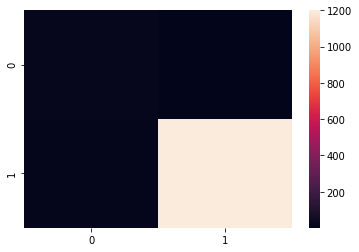

In [123]:
cm = [[16, 0.67], [13, 1200]]
sns.heatmap(cm)

In [156]:
cm = pickle.load(open("../Plots/001_Knee_extension_downsample_16_balance_30_128_filters/cms.p", "rb"))

In [157]:
cm_final = np.zeros((2,2))
for subj, cm_mini in cm.items():
    cm_final += cm_mini
cm_final /= len(get_subject_names())

In [158]:
cm_final /= cm_final.astype(np.float).sum(axis=1)

In [159]:
cm_labels = ["Positive", "Negative"]

In [160]:
small_font = 22
big_font=27

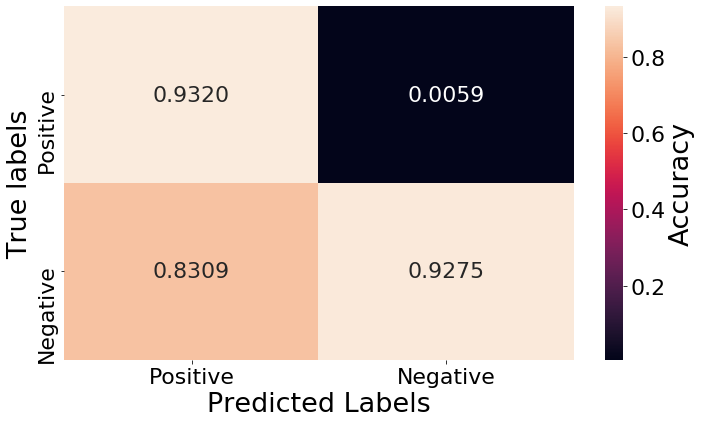

In [162]:
fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(cm_final, annot=True, fmt='.4f', xticklabels=cm_labels, yticklabels=cm_labels, 
                 annot_kws={"size": small_font})
plt.xlabel("Predicted Labels", fontsize=big_font)
plt.ylabel("True labels", fontsize=big_font)
ax.collections[0].colorbar.set_label("Accuracy", fontsize=big_font)
plt.setp(ax.get_xticklabels(), fontsize=small_font)
plt.setp(ax.get_yticklabels(), fontsize=small_font)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=small_font)
fig.tight_layout()
plt.savefig("./blah.pdf")

In [147]:
mean_std_f1(cm)

(0.8009177415860197, 0.08128273816374428)

In [198]:
teo_fast_walk = pd.read_csv("../Validation/teo_fast_walk.csv")
smoothed = savgol_filter(teo_fast_walk[teo_fast_walk['z'].notnull()]['y'].values, 3, 1)
num_steps = detect_peaks(smoothed)
print(len(num_steps))

102


In [192]:
teo_slow_walk = pd.read_csv("../Validation/teo_slow_walk.csv")
smoothed = savgol_filter(teo_slow_walk[teo_slow_walk['z'].notnull()]['y'].values, 11, 1)
num_steps = detect_peaks(smoothed, mpd=5)
print(len(num_steps))

76


In [197]:
teo_shuffle_walk = pd.read_csv("../Validation/teo_shuffle_walk.csv")
smoothed = savgol_filter(teo_shuffle_walk[teo_shuffle_walk['z'].notnull()]['y'].values, 7, 1)
num_steps = detect_peaks(smoothed, mpd=5)
print(len(num_steps))

68


In [203]:
seb_slow_walk = pd.read_csv("../Validation/seb_slow_walk.csv")
smoothed = savgol_filter(seb_slow_walk[seb_slow_walk['z'].notnull()]['y'].values, 11, 1)
num_steps = detect_peaks(smoothed, mpd=11)
print(len(num_steps))

39


In [202]:
seb_shuffle_walk = pd.read_csv("../Validation/seb_shuffle_walk.csv")
smoothed = savgol_filter(seb_shuffle_walk[seb_shuffle_walk['z'].notnull()]['y'].values, 13, 1)
num_steps = detect_peaks(smoothed, mpd=5)
print(len(num_steps))

59


In [206]:
adela_fast_walk = pd.read_csv("../Validation/adela_fast_walk.csv")
smoothed = savgol_filter(adela_fast_walk[adela_fast_walk['z'].notnull()]['y'].values, 3, 1)
num_steps = detect_peaks(smoothed, mpd=3)
print(len(num_steps))

91


In [211]:
adela_slow_walk = pd.read_csv("../Validation/adela_slow_walk.csv")
smoothed = savgol_filter(adela_slow_walk[adela_slow_walk['z'].notnull()]['y'].values, 11, 1)
num_steps = detect_peaks(smoothed, mpd=6)
print(len(num_steps))

55


In [220]:
adela_shuffle_walk = pd.read_csv("../Validation/adela_shuffle_walk.csv")
smoothed = savgol_filter(adela_shuffle_walk[adela_shuffle_walk['z'].notnull()]['y'].values, 11, 1)
num_steps = detect_peaks(smoothed, mpd=7)
print(len(num_steps))

51
